In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf

In [8]:

import os
encode="ISO-8859-1"
def read_txt_to_df(*,  path=None, filename):

    path2=path+'/'+ 'intertxt'
    if os.path.exists(path2):
        a='path exists'
    else:
        os.makedirs(path+'/'+ 'intertxt', exist_ok=False)
        print('Ive made a new folder to store your intermediate txt files in')

    if path is None:
        fr = open(filename, 'r', encoding=encode)

        fw=open('pandas2_'+filename, 'w')
    else:
        fr = open(path+'/'+filename, 'r', encoding=encode)
        fw= open(path+'/'+'intertxt'+'/'+'pandas2_'+filename, 'w')


    while True:
        l=fr.readline()
        if not l.startswith('#'):

            break

    for line in fr:
        fw.write(line.lstrip())

    fw.close()
    fr.close()
    if path is None:
        print(filename)
        df=pd.read_csv('pandas2_'+filename, sep=" ", header=None)
    else:
        print(filename)
        df=pd.read_csv(path+'/'+'intertxt'+'/'+'pandas2_'+filename, sep=" ", header=None)

        return df
os.environ['NUMEXPR_MAX_THREADS'] = '16'

In [9]:
path='G:\My Drive\Postdoc\PyMME\MyBarometers\Thermobar_outer\docs\Examples\Other_features'


In [10]:
df=pd.read_csv('Denlinger_2022_Density_Depth.txt', header=None)

In [29]:
df=read_txt_to_df(path=path, filename='Denlinger_2022_Density_Depth.txt')

Denlinger_2022_Density_Depth.txt


In [30]:
ar=np.array(df)#[500:600, :]
ar

array([[ -15.        , 3062.556885  ],
       [ -15.        , 3062.556885  ],
       [ -15.        , 3062.556885  ],
       ...,
       [  -5.3175931 , 2868.117676  ],
       [  -5.30872822, 2867.470947  ],
       [  -5.30004787, 2866.809326  ]])

In [31]:
plt.plot( ar[:, 1], ar[:, 2], '.k')
plt.xlabel('density')
plt.ylabel('depth')


IndexError: index 2 is out of bounds for axis 1 with size 2

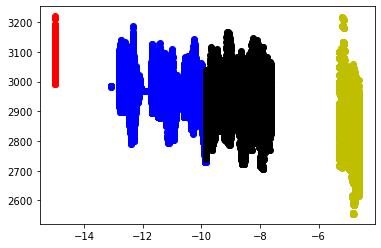

In [35]:
sort=np.sort(ar[ar[:, 0].argsort()])


plt.plot(sort[0:1000, 0], sort[0:1000, 1], 'or')
len1=2515500
plt.plot(sort[(int(len1*0.1)):(int(len1*0.2)), 0], sort[int(len1*0.1):int(len1*0.2), 1], 'ob')

plt.plot(sort[(int(len1*0.2)):(int(len1*0.3)), 0], sort[int(len1*0.2):int(len1*0.3), 1], 'ok')

plt.plot(sort[(int(len1*0.7)):(int(len1*0.8)), 0], sort[int(len1*0.7):int(len1*0.8), 1], 'oy')


In [37]:
min(sort[:, 0])

-15.0

In [38]:
max(sort[:, 0])

4.150213242

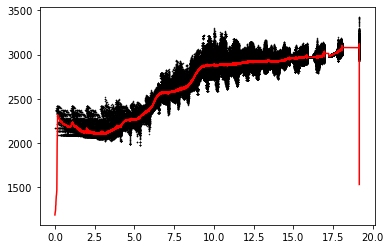

In [42]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

x = np.abs(sort[:, 0]-4.150213242)
y = sort[:, 1]

plt.plot(x,y,"k.", ms=1)
y_av = movingaverage(y, 100)
plt.plot(x, y_av,"r")


In [50]:
x[0:2]

array([19.15021324, 19.15021324])

C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\penny\AppData\Local\Temp\ipykernel_14596\1013930062.py:21: RuntimeWarning: Mean of empty slice
  P_mean[i]=np.nanmean(x[filt])
C:\Users\penny\AppData\Local\Temp\ipykernel_14596\1013930062.py:22: RuntimeWarning: Mean of empty slice
  p_mean[i]=np.nanmean(y[filt])
C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\penny\AppData\Local\Temp\ipykernel_14596\1013930062.py:21: RuntimeWarning: Mean of empty slice
  P_mean[i]=np.nanmean(x[filt])
C:\Users\penny\AppData\Local\Temp\ipykernel_14596\1013930062.py:22: 

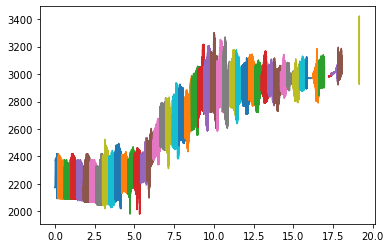

In [65]:


D_lin=np.linspace(start=0, stop=20, endpoint=False)
dist=D_lin[1]-D_lin[0]
D_mean=np.empty(len(D_lin),dtype='float')
D_min=np.empty(len(D_lin),dtype='float')
D_max=np.empty(len(D_lin),dtype='float')

p_med=np.empty(len(D_lin), dtype='float')
p_mean=np.empty(len(D_lin),dtype='float')
p_std=np.empty(len(D_lin),dtype='float')
cum_av_p=np.empty(len(D_lin),dtype='float')
cum_av_Press=np.empty(len(D_lin),dtype='float')
num_meas=np.empty(len(D_lin),dtype='float')

for i in range(0, len(D_lin)):
    D_min[i]=D_lin[i]-dist/2
    D_max[i]=D_lin[i]+dist/2

    filt=(x>(D_lin[i]-dist/2)) & (x<(D_lin[i]+dist/2))
    num_meas[i]=len(x[filt])
    p_med[i]=np.nanmedian(y[filt])
    P_mean[i]=np.nanmean(x[filt])
    p_mean[i]=np.nanmean(y[filt])
    p_std[i]=np.nanstd(y[filt])
    plt.plot(x[filt], y[filt])
    cum_av_p[i]=np.sum(p_mean[0:i+1])/(i+1)
    cum_av_Press[i]=D_mean[i]*1000*(cum_av_p[i]*9.81)
    
df=pd.DataFrame(data={'Number of measurements per bin': num_meas,
                      'Min_depth_bin': D_min,
                      'Max_depth_bin': D_max,
                      'Av_depth_Pressure_bin': D_mean,
                      'density_mean': p_mean,
                      'density_std': p_std,
                      'cum density average': cum_av_p,
                      'cum pressure average': cum_av_Press*10**(-8)})

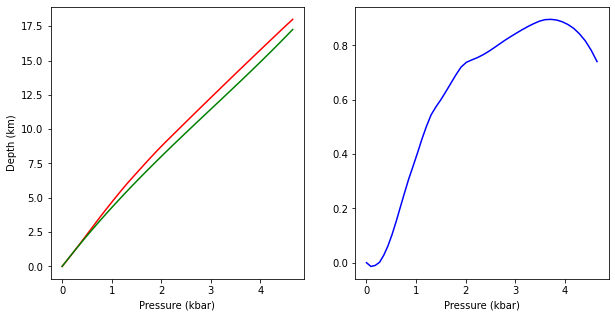

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot( df['cum pressure average'],df['Av_depth_Pressure_bin'], '-r')
import Thermobar as pt
P_array=np.linspace(0.1, 10, 10)

ryan_lerner=pt.convert_pressure_to_depth(P_kbar=df['cum pressure average'],
                                      model="ryan_lerner")

ax1.plot(df['cum pressure average'], ryan_lerner, '-g')
ax1.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Depth (km)')
ax2.set_xlabel('Pressure (kbar)')

ax2.plot(df['cum pressure average'], df['Av_depth_Pressure_bin']-ryan_lerner, '-b')

Text(0.5, 0, 'Pressure kbar')

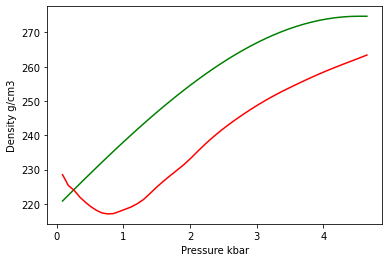

In [92]:
plt.plot(df['cum pressure average'], 0.001*df['cum pressure average']*10**(7)/(ryan_lerner*9.81), '-g', label='ryan-lerner')
plt.plot(df['cum pressure average'], 0.001*df['cum pressure average']*10**(7)/(df['Av_depth_Pressure_bin']*9.81), '-r', label='Denlinger2022')
plt.ylabel('Density g/cm3')
plt.xlabel('Pressure kbar')


Text(0.5, 0, 'Depth km')

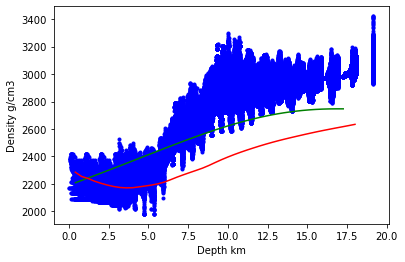

In [99]:
plt.plot(x, y, '.b')

plt.plot(ryan_lerner, df['cum pressure average']*10**(5)/(ryan_lerner*9.81), '-g', label='ryan-lerner')
plt.plot(df['Av_depth_Pressure_bin'], df['cum pressure average']*10**(5)/(df['Av_depth_Pressure_bin']*9.81), '-r', label='Denlinger2022')
plt.ylabel('Density g/cm3')
plt.xlabel('Depth km')


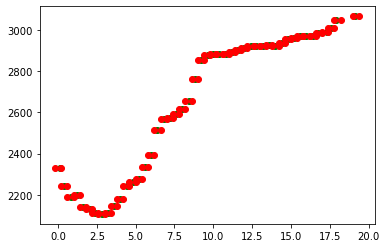

In [46]:
plt.plot(P_mean, p_mean, 'og')
plt.plot(P_max, p_mean, 'or')
plt.plot(P_min, p_mean, 'or')

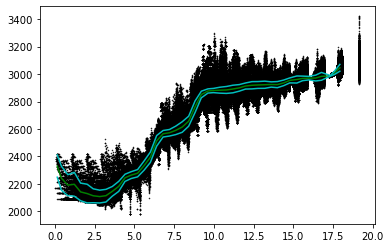

In [48]:
plt.plot(x,y,"k.", ms=1)
#plt.plot(d_mean, p_med, 'or')
plt.plot(P_mean, p_mean, '-g')
plt.plot(P_mean, p_mean+p_std, '-c')
plt.plot(P_mean, p_mean-p_std, '-c')

In [ ]:
plt.plot(

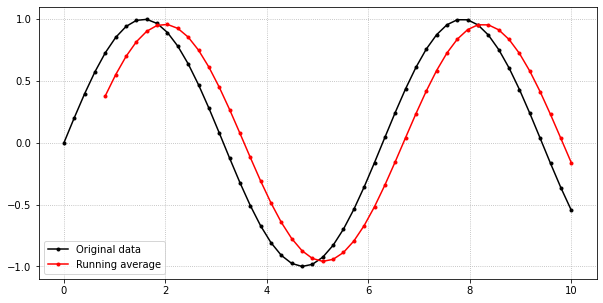

In [114]:
x = np.linspace(0, 10, 50)
y = np.sin(x)
window = 5
average_y = []
for ind in range(len(y) - window + 1):
    average_y.append(np.mean(y[ind:ind+window]))
for ind in range(window - 1):
    average_y.insert(0, np.nan)    
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'k.-', label='Original data')
plt.plot(x, average_y, 'r.-', label='Running average')
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.grid(linestyle=':')
plt.legend()
plt.show()

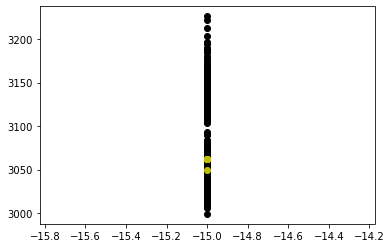

In [98]:
plt.plot(sort[0:10, 1], sort[0:10, 2], 'or')

plt.plot(sort[20:30, 1], sort[20:30, 2], 'ob')

plt.plot(sort[200:310, 1], sort[200:310, 2], 'oc')

plt.plot(sort[2000:3010, 1], sort[2000:3010, 2], 'ok')

#plt.plot(sort[20000:30010, 1], sort[20000:30010, 2], 'oy')

plt.plot(sort[40000:40010, 1], sort[40000:40010, 2], 'oy')

In [ ]:
a

In [14]:
plt.plot(ar[:, 0], ar[:, 1], '-r')

IndexError: index 1 is out of bounds for axis 1 with size 1